## TF: Graphs ##

In [2]:
import numpy as np
import tensorflow as tf

In [3]:
np.random.seed(101)
tf.set_random_seed(101)

In [4]:
rand_a = np.random.uniform(0,100,(5,5))

In [5]:
rand_a

array([[ 51.63986277,  57.06675869,   2.84742265,  17.15216562,
         68.52769817],
       [ 83.38968626,  30.69662197,  89.36130797,  72.15438618,
         18.99389542],
       [ 55.42275911,  35.2131954 ,  18.18924027,  78.56017619,
         96.54832224],
       [ 23.23536618,   8.35614337,  60.35484223,  72.89927573,
         27.62388285],
       [ 68.53063288,  51.78674742,   4.84845374,  13.78692376,
         18.69674261]])

In [7]:
rand_b = np.random.uniform(0,100,(5,1))

In [8]:
rand_b

array([[ 91.31535577],
       [ 80.7920151 ],
       [ 40.29978307],
       [ 35.72243428],
       [ 95.28767147]])

In [9]:
a = tf.placeholder(tf.float32)

In [16]:
b = tf.placeholder(tf.float32)

In [11]:
add_op = a + b

In [12]:
mul_op = a * b

In [14]:
with tf.Session() as sess:
  
  add_result = sess.run(add_op,feed_dict={a:rand_a,b:rand_b})
  print(add_result)
  print('\n')
  mult_result = sess.run(mul_op,feed_dict={a:rand_a,b:rand_b})
  print(mult_result)

[[ 142.95521545  148.3821106    94.16277313  108.46752167  159.8430481 ]
 [ 164.18170166  111.48863983  170.15332031  152.94641113   99.78591156]
 [  95.72254181   75.5129776    58.4890213   118.85995483  136.84811401]
 [  58.95780182   44.07857895   96.07727814  108.62171173   63.34631729]
 [ 163.81829834  147.07441711  100.13612366  109.07460022  113.98442078]]


[[ 4715.51220703  5211.07128906   260.01339722  1566.25610352
   6257.63085938]
 [ 6737.22070312  2480.04199219  7219.6796875   5829.49853516
   1534.55505371]
 [ 2233.52514648  1419.08410645   733.0223999   3165.95776367
   3890.87646484]
 [  830.02386475   298.50177002  2156.02197266  2604.13964844   986.7923584 ]
 [ 6530.12451172  4934.63867188   461.99786377  1313.72387695  1781.5690918 ]]


### **Example Neural Network**

In [15]:
n_features = 10
n_dense_neurons = 3

In [13]:
x = tf.placeholder(tf.float32,(None,n_features))

In [14]:
W = tf.Variable(tf.random_normal([n_features, n_dense_neurons]))


b = tf.Variable(tf.ones([n_dense_neurons]))

In [15]:
xW = tf.matmul(x,W)

In [16]:
z = tf.add(xW,b)

In [17]:
a = tf.sigmoid(z)

In [18]:
init = tf.global_variables_initializer()

In [19]:
with tf.Session() as sess:
  
  sess.run(init)
  
  layer_out = sess.run(a,feed_dict={x:np.random.random([1,n_features])})

In [20]:
print(layer_out)

[[ 0.19592889  0.84230143  0.36188066]]


## **Simple Regression Example**

In [21]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [22]:
x_data

array([-1.20856056, -0.08034641,  2.82674411,  4.50477294,  3.42312535,
        4.88227319,  7.18414126,  6.77068715,  9.4930023 ,  9.96290567])

In [23]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1.5,1.5,10)

In [24]:
y_label

array([ 0.5420333 ,  1.17575569,  0.85241231,  2.50514314,  4.67005971,
        4.41685654,  6.66701681,  6.69180648,  7.54731409,  9.03483077])

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

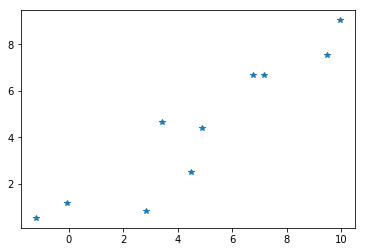

In [26]:
plt.plot(x_data,y_label, '*')

### y = mx + b

In [27]:
np.random.rand(2)

array([ 0.44236813,  0.87758732])

In [28]:
np.random.seed(100)

In [29]:
np.random.rand(2)

array([ 0.54340494,  0.27836939])

In [30]:
m = tf.Variable(0.54)
b = tf.Variable(0.27)

In [31]:
error = 0

for x,y in zip(x_data,y_label):
  
  y_hat = m*x + b
  
  error += (y-y_hat)**2

In [32]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [33]:
init = tf.global_variables_initializer()

In [34]:
with tf.Session() as sess:
    
    sess.run(init)
    
    training_steps = 100
    
    for i in range(training_steps):
        
        sess.run(train)
        
    final_slope, final_intercept = sess.run([m,b])

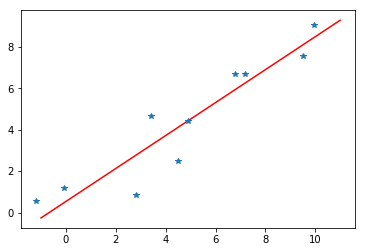

In [36]:
x_test = np.linspace(-1,11,10)

#y = mx + b
y_pred_plot = final_slope*x_test + final_intercept

plt.plot(x_test,y_pred_plot,'r')
plt.plot(x_data,y_label,'*')


# Realistic Regression

In [37]:
import pandas as pd

In [38]:
x_data = np.linspace(0.0,10.0,1000000)

In [39]:
noise = np.random.random(len(x_data))

In [40]:
noise

array([ 0.42451759,  0.84477613,  0.00471886, ...,  0.76762922,
        0.68639569,  0.64882092])

In [41]:
y_true = (0.5 * x_data) + 5 + noise

In [42]:
x_df = pd.DataFrame(data=x_data,columns=['X Data'])

In [43]:
y_df = pd.DataFrame(data=y_true,columns=['Y'])

In [185]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [187]:
y_df.head()

,Y
0,5.424518
1,5.844781
2,5.004729
3,5.121584
4,5.670769


In [188]:
my_data = pd.concat([x_df,y_df],axis=1)

In [189]:
my_data.head()

,X Data,Y
0,0.00000,5.424518
1,0.00001,5.844781
2,0.00002,5.004729
3,0.00003,5.121584
4,0.00004,5.670769


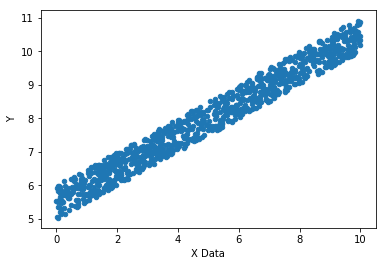

In [190]:
my_data.sample(n=1000).plot(kind='scatter',x='X Data',y='Y')

In [191]:
batch_size = 8

In [198]:
m = tf.Variable(5.2)
b = tf.Variable(0.9)

In [199]:
xph = tf.placeholder(tf.float32,[batch_size])

In [200]:
yph = tf.placeholder(tf.float32,[batch_size])

In [201]:
y_model = m * xph + b

In [204]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [205]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [206]:
init = tf.global_variables_initializer()

In [207]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 10000
    
    for i in range(batches):
        
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        
        feed = {xph:x_data[rand_ind],yph:y_true[rand_ind]}
        
        sess.run(train,feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [208]:
model_m

0.50870854

In [209]:
model_b

5.4871

In [210]:
y_hat = x_data*model_m + model_b

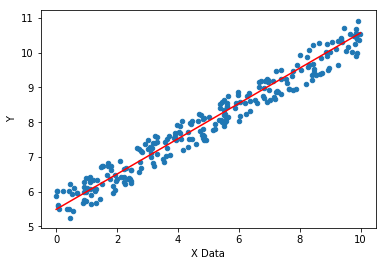

In [211]:
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')

# TensorFlow Estimator API: Regression

In [217]:
feat_cols = [tf.feature_column.numeric_column('x',shape=[1])]

In [218]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3e84a128>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [219]:
from sklearn.model_selection import train_test_split

In [220]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_true,test_size=0.3,random_state=101)

In [221]:
print(x_train.shape)

(700000,)


In [222]:
x_test.shape

(300000,)

In [224]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=None,shuffle=True)

In [225]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train},y_train,batch_size=8,num_epochs=1000,shuffle=False)

In [226]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test},y_test,batch_size=8,num_epochs=1000,shuffle=False)

In [228]:
estimator.train(input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1001 into /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt.
INFO:tensorflow:loss = 1.3976095, step = 1001
INFO:tensorflow:global_step/sec: 197.022
INFO:tensorflow:loss = 2.0152707, step = 1101 (0.509 sec)
INFO:tensorflow:global_step/sec: 325.492
INFO:tensorflow:loss = 0.8338649, step = 1201 (0.317 sec)
INFO:tensorflow:global_step/sec: 167.707
INFO:tensorflow:loss = 1.2026885, step = 1301 (0.618 sec)
INFO:tensorflow:global_step/sec: 100.872
INFO:tensorflow:loss = 1.6152815, step = 1401 (0.960 sec)
INFO:tensorflow:global_step/sec: 236.07
INFO:tensorflow:loss = 1.280971, step = 

In [229]:
train_metrics = estimator.evaluate(input_fn=train_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-04-11:54:25
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-04-11:54:30
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.08621604, global_step = 2000, loss = 0.6897283


In [230]:
test_metrics = estimator.evaluate(input_fn=test_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-05-04-11:55:09
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-05-04-11:55:16
INFO:tensorflow:Saving dict for global step 2000: average_loss = 0.0873446, global_step = 2000, loss = 0.6987568


In [231]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 0.08621604, 'loss': 0.6897283, 'global_step': 2000}


In [232]:
print("TEST METRICS")
print(test_metrics)

TEST METRICS
{'average_loss': 0.0873446, 'loss': 0.6987568, 'global_step': 2000}


In [233]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data},shuffle=False)

In [234]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([5.37073], dtype=float32)},
 {'predictions': array([5.9459867], dtype=float32)},
 {'predictions': array([6.521243], dtype=float32)},
 {'predictions': array([7.0965], dtype=float32)},
 {'predictions': array([7.6717567], dtype=float32)},
 {'predictions': array([8.247013], dtype=float32)},
 {'predictions': array([8.822269], dtype=float32)},
 {'predictions': array([9.397527], dtype=float32)},
 {'predictions': array([9.972784], dtype=float32)},
 {'predictions': array([10.54804], dtype=float32)}]

In [235]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmp6ezprgbb/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [236]:
predictions

[array([5.37073], dtype=float32),
 array([5.9459867], dtype=float32),
 array([6.521243], dtype=float32),
 array([7.0965], dtype=float32),
 array([7.6717567], dtype=float32),
 array([8.247013], dtype=float32),
 array([8.822269], dtype=float32),
 array([9.397527], dtype=float32),
 array([9.972784], dtype=float32),
 array([10.54804], dtype=float32)]

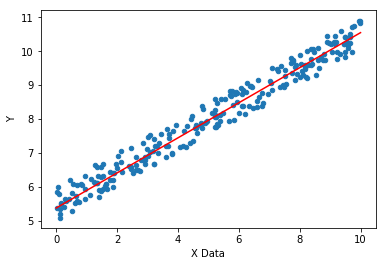

In [237]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r')

# TF Estimator: Classification

In [115]:
diabetes = pd.read_csv('diabetes.csv')

In [116]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [117]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [120]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [123]:
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max()-x.min()))

In [124]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [125]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [126]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_pres = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [130]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [131]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

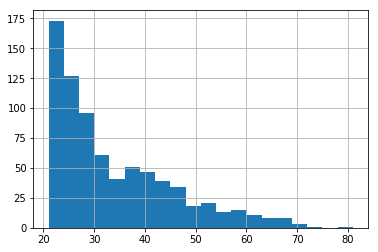

In [132]:
diabetes['Age'].hist(bins=20)

In [133]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [134]:
feat_cols = [num_preg,plasma_gluc,dias_pres,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [135]:
# Train Test Split

In [136]:
x_data = diabetes.drop('Class',axis=1)

In [138]:
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [139]:
labels = diabetes['Class']

In [140]:
#labels

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.3,random_state=101)

In [144]:
input_func = tf.estimator.inputs.pandas_input_fn(x=x_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [145]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols, n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmpdf0bmwl_', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1a3e574198>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [146]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/r8/hm43s1l52p377gxjx5hp3n9c0000gn/T/tmpdf0bmwl_/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 133.089
INFO:tensorflow:loss = 6.8707247, step = 101 (0.750 sec)
INFO:tensorflow:global_step/sec: 83.6943
INFO:tensorflow:loss = 3.7978292, step = 201 (1.201 sec)
INFO:tensorflow:global_step/sec: 218.885
INFO:tensorflow:loss = 5.248306, step = 301 (0.455 sec)
INFO:tensorflow:global_step/sec: 233.383
INFO:tensorflow:loss = 4.871402, step = 401 (0.431 sec)
INFO:tensorflow:global_step/sec: 279.8
INFO:tensorflow:loss = 3.9654422, step = 501 (0.354 sec)
INFO:tensorflow:global_step/sec: 290.114
INFO:tensorflow:loss = 4.9698, step = 601 (0.342 sec)
INFO:tensorflow:globa